# Plots Task 2

### Import librerias

In [1]:
import lithops
import pandas as pd
from io import StringIO
from pandasql import sqldf
import pandasql
from lithops import Storage
from lithops import FunctionExecutor
from pylab import *
import matplotlib.pyplot as plt
import sqlalchemy

In [2]:
fexec = lithops.FunctionExecutor(runtime_memory=2048)

2021-06-16 16:02:11,218 [INFO] lithops.config -- Lithops v2.3.3
2021-06-16 16:02:11,386 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-06-16 16:02:11,387 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-gb - Namespace: raul.mesa@estudiants.urv.cat_dev
2021-06-16 16:02:11,388 [INFO] lithops.executors -- Serverless Executor created with ID: d0acda-0


### Funciones auxiliares

In [3]:
def formatar(query):
    query = query.str.replace('00:00:00.000000','',regex=True)
    query = query.str.replace('2020','20',regex=True)
    query = query.str.replace('2021','21',regex=True)
    return query

In [4]:
def graph_plot(query, x, y):
    fig, ax = plt.subplots(figsize=(16, 7))
    query[x] = formatar(query[x])
    ax.plot(query[x], query[y])
    plt.show()

In [5]:
def getData(select):
    storage = Storage()
    #data = storage.get_object('task2-sd', objectCSV_1)
    data = storage.get_object('task2-sd', 'database.csv')

    format_data = str(data[0:-1], 'utf-8')
    database = pd.read_csv(StringIO(format_data))

    database["TipusCasData"]= pd.to_datetime(database["TipusCasData"])
    database = database.sort_values(by="TipusCasData")
    query = sqldf(select)

    return query

In [6]:
def graph_plot_multiline(query1, x1, y1, label1, query2, x2, y2, label2):
    fig, ax = plt.subplots(figsize=(16, 7))
    query1[x1] = formatar(query1[x1])
    ax.plot(query1[x1], query1[y1], label = label1)
    query2[x2] = formatar(query2[x2])
    ax.plot(query2[x2], query2[y2], label = label2)
    plt.legend()
    plt.show()

### Query 1: consulta n casos por tiempo en la comarca del Tarragones

In [7]:
fexec.call_async(getData, "SELECT NumCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' GROUP BY TipusCasData", runtime_memory=2048)
query = fexec.get_result()

2021-06-16 16:02:19,864 [INFO] lithops.invokers -- ExecutorID d0acda-0 | JobID A000 - Selected Runtime: meszon/lithops-custom-runtimev38:0.1 - 2048MB
2021-06-16 16:02:19,896 [INFO] lithops.job.job -- ExecutorID d0acda-0 | JobID A000 - Uploading function and data - Total: 1.0KiB
2021-06-16 16:02:20,404 [INFO] lithops.invokers -- ExecutorID d0acda-0 | JobID A000 - Starting function invocation: getData() - Total: 1 activations
2021-06-16 16:02:20,407 [INFO] lithops.invokers -- ExecutorID d0acda-0 | JobID A000 - View execution logs at /tmp/lithops/logs/d0acda-0-A000.log
2021-06-16 16:02:20,411 [INFO] lithops.wait -- ExecutorID d0acda-0 - Getting results from functions


    0%|          | 0/1  

2021-06-16 16:02:29,795 [INFO] lithops.executors -- ExecutorID d0acda-0 - Cleaning temporary data


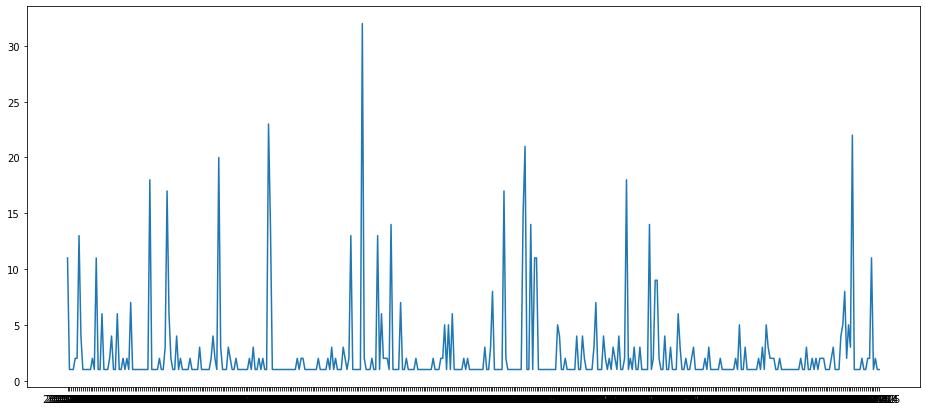

In [8]:
query['TipusCasData'] = formatar(query['TipusCasData'])
graph_plot(query, 'TipusCasData', 'NumCasos')

### Query 2: consulta n. casos por comarca A-L

In [9]:
fexec.call_async(getData, "SELECT SUM(NumCasos) AS TotalCasos, ComarcaDescripcio FROM database WHERE ComarcaDescripcio < 'L%'  GROUP BY ComarcaDescripcio", runtime_memory=2048)
query = fexec.get_result()

2021-06-16 13:14:35,211 [INFO] lithops.invokers -- ExecutorID 1fd7eb-0 | JobID A001 - Selected Runtime: meszon/lithops-custom-runtimev38:0.1 - 2048MB
2021-06-16 13:14:35,216 [INFO] lithops.job.job -- ExecutorID 1fd7eb-0 | JobID A001 - Uploading function and data - Total: 1.0KiB
2021-06-16 13:14:35,432 [INFO] lithops.invokers -- ExecutorID 1fd7eb-0 | JobID A001 - Starting function invocation: getData() - Total: 1 activations
2021-06-16 13:14:35,434 [INFO] lithops.invokers -- ExecutorID 1fd7eb-0 | JobID A001 - View execution logs at /tmp/lithops/logs/1fd7eb-0-A001.log
2021-06-16 13:14:35,439 [INFO] lithops.wait -- ExecutorID 1fd7eb-0 - Getting results from functions


    0%|          | 0/2  

2021-06-16 13:14:42,548 [INFO] lithops.executors -- ExecutorID 1fd7eb-0 - Cleaning temporary data


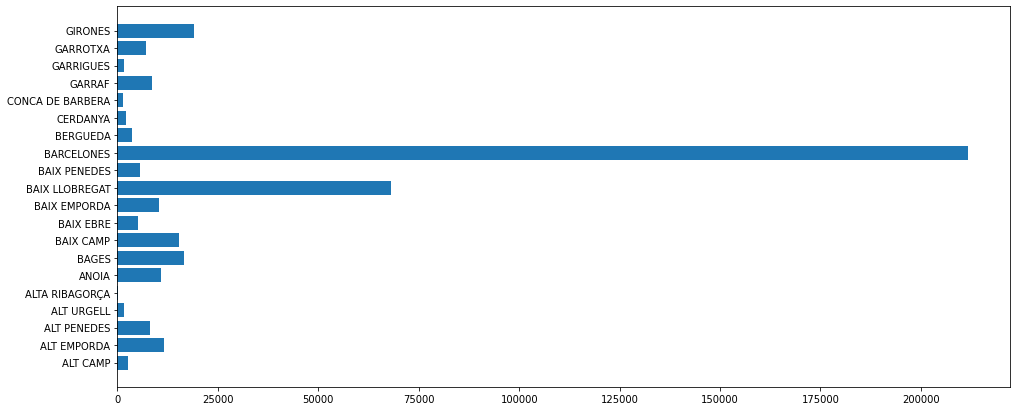

In [10]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.barh(query['ComarcaDescripcio'], query['TotalCasos'])
plt.show()

### Query 3: consulta n. casos por comarca M-Z

In [11]:
fexec.call_async(getData, "SELECT SUM(NumCasos) AS TotalCasos, ComarcaDescripcio FROM database WHERE ComarcaDescripcio >= 'L%'  GROUP BY ComarcaDescripcio", runtime_memory=2048)
query = fexec.get_result()

2021-06-16 13:14:48,059 [INFO] lithops.invokers -- ExecutorID 1fd7eb-0 | JobID A002 - Selected Runtime: meszon/lithops-custom-runtimev38:0.1 - 2048MB
2021-06-16 13:14:48,063 [INFO] lithops.job.job -- ExecutorID 1fd7eb-0 | JobID A002 - Uploading function and data - Total: 1.1KiB
2021-06-16 13:14:48,313 [INFO] lithops.invokers -- ExecutorID 1fd7eb-0 | JobID A002 - Starting function invocation: getData() - Total: 1 activations
2021-06-16 13:14:48,316 [INFO] lithops.invokers -- ExecutorID 1fd7eb-0 | JobID A002 - View execution logs at /tmp/lithops/logs/1fd7eb-0-A002.log
2021-06-16 13:14:48,319 [INFO] lithops.wait -- ExecutorID 1fd7eb-0 - Getting results from functions


    0%|          | 0/3  

2021-06-16 13:14:55,479 [INFO] lithops.executors -- ExecutorID 1fd7eb-0 - Cleaning temporary data


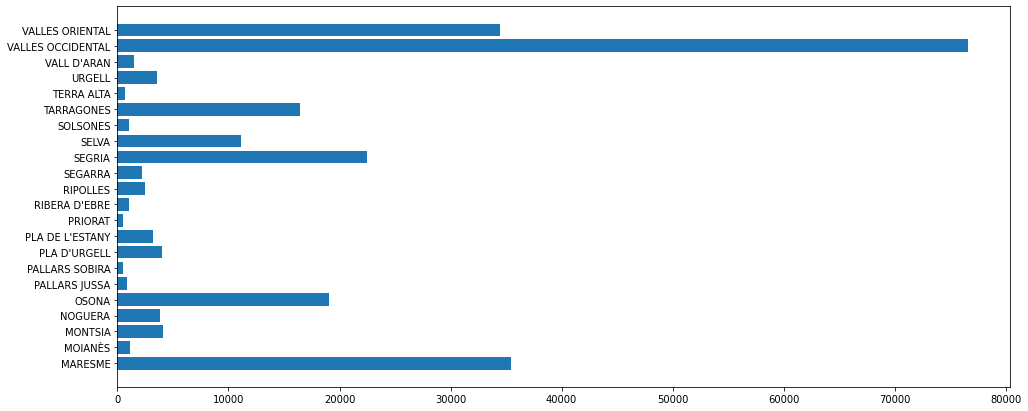

In [12]:
fig, ax = plt.subplots(figsize=(16, 7))
ax.barh(query['ComarcaDescripcio'], query['TotalCasos'])
plt.show()

### Query 4: consulta n. casos en un mes de todas las comarcas

In [13]:
fexec.call_async(getData, "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE TipusCasData BETWEEN '2020-01-01' AND '2020-02-01' GROUP BY TipusCasData", runtime_memory=2048)
query = fexec.get_result()

2021-06-16 13:15:01,699 [INFO] lithops.invokers -- ExecutorID 1fd7eb-0 | JobID A003 - Selected Runtime: meszon/lithops-custom-runtimev38:0.1 - 2048MB
2021-06-16 13:15:01,704 [INFO] lithops.job.job -- ExecutorID 1fd7eb-0 | JobID A003 - Uploading function and data - Total: 1.1KiB
2021-06-16 13:15:01,888 [INFO] lithops.invokers -- ExecutorID 1fd7eb-0 | JobID A003 - Starting function invocation: getData() - Total: 1 activations
2021-06-16 13:15:01,889 [INFO] lithops.invokers -- ExecutorID 1fd7eb-0 | JobID A003 - View execution logs at /tmp/lithops/logs/1fd7eb-0-A003.log
2021-06-16 13:15:01,893 [INFO] lithops.wait -- ExecutorID 1fd7eb-0 - Getting results from functions


    0%|          | 0/4  

2021-06-16 13:15:10,024 [INFO] lithops.executors -- ExecutorID 1fd7eb-0 - Cleaning temporary data


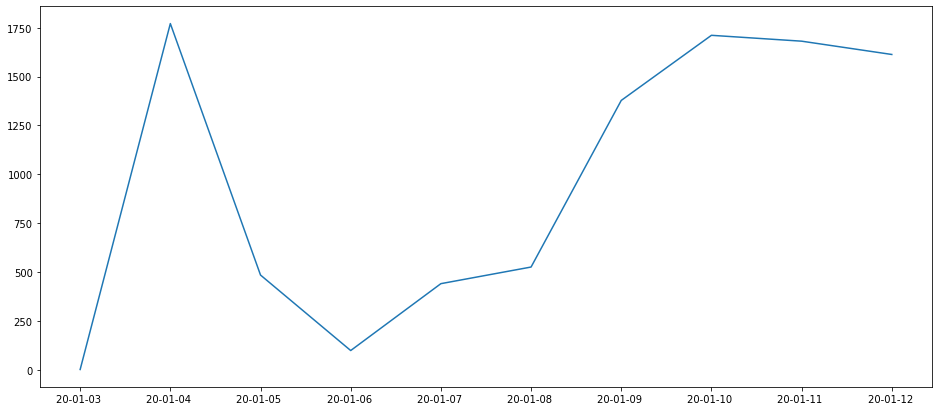

In [14]:
query['TipusCasData'] = formatar(query['TipusCasData'])
graph_plot(query, 'TipusCasData', 'TotalCasos')

### Query 5: consulta paralelizadas de n. casos de la comarca del Tarragones

In [9]:
fexec.map(getData, [
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-01-01' AND '2020-03-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-03-01' AND '2020-05-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-05-01' AND '2020-07-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-07-01' AND '2020-09-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-09-01' AND '2020-11-01' GROUP BY TipusCasData",
        "SELECT SUM(NumCasos) AS TotalCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' AND TipusCasData BETWEEN '2020-11-01' AND '2021-01-01' GROUP BY TipusCasData"
    ])
query = fexec.get_result()

2021-06-16 13:36:17,384 [INFO] lithops.invokers -- ExecutorID 0f4467-0 | JobID M001 - Selected Runtime: meszon/lithops-custom-runtimev38:0.1 - 2048MB
2021-06-16 13:36:17,388 [INFO] lithops.job.job -- ExecutorID 0f4467-0 | JobID M001 - Uploading function and data - Total: 2.1KiB
2021-06-16 13:36:17,666 [INFO] lithops.invokers -- ExecutorID 0f4467-0 | JobID M001 - Starting function invocation: getData() - Total: 6 activations
2021-06-16 13:36:17,672 [INFO] lithops.invokers -- ExecutorID 0f4467-0 | JobID M001 - View execution logs at /tmp/lithops/logs/0f4467-0-M001.log
2021-06-16 13:36:17,679 [INFO] lithops.wait -- ExecutorID 0f4467-0 - Getting results from functions


    0%|          | 0/7  

2021-06-16 13:36:29,029 [INFO] lithops.executors -- ExecutorID 0f4467-0 - Cleaning temporary data


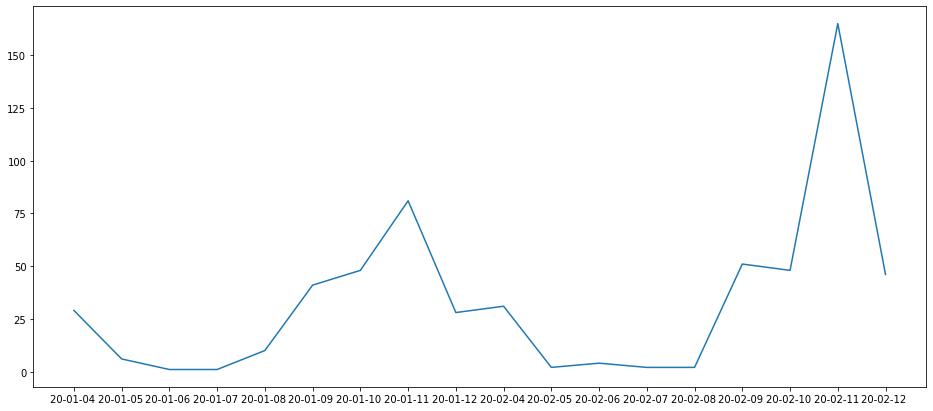

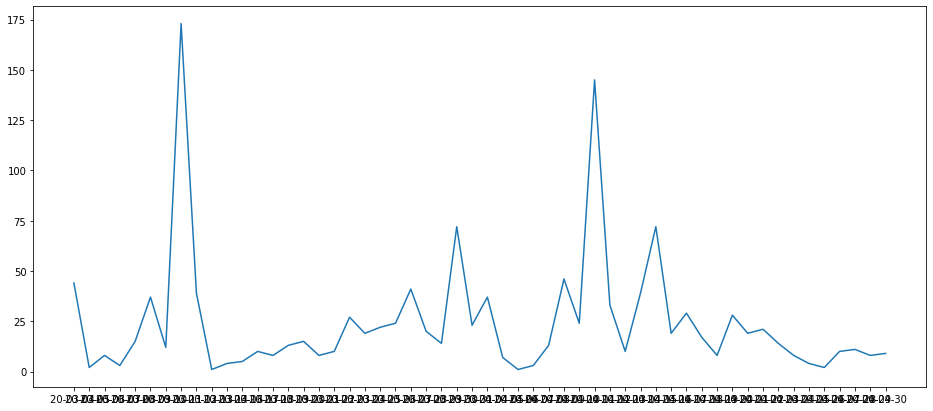

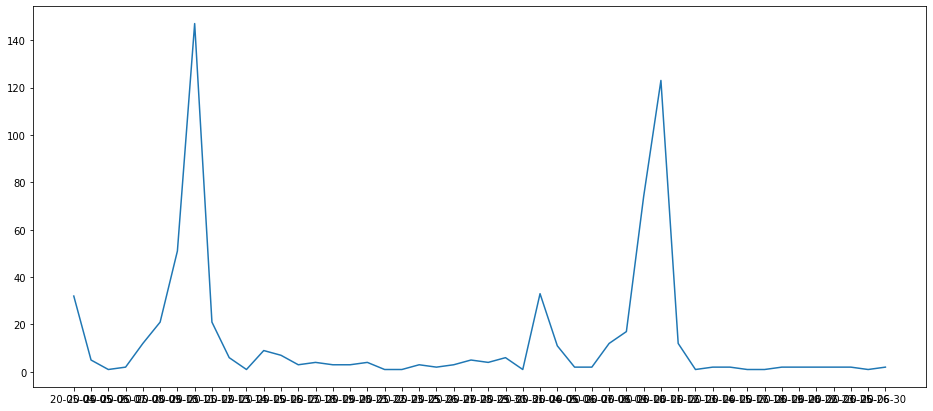

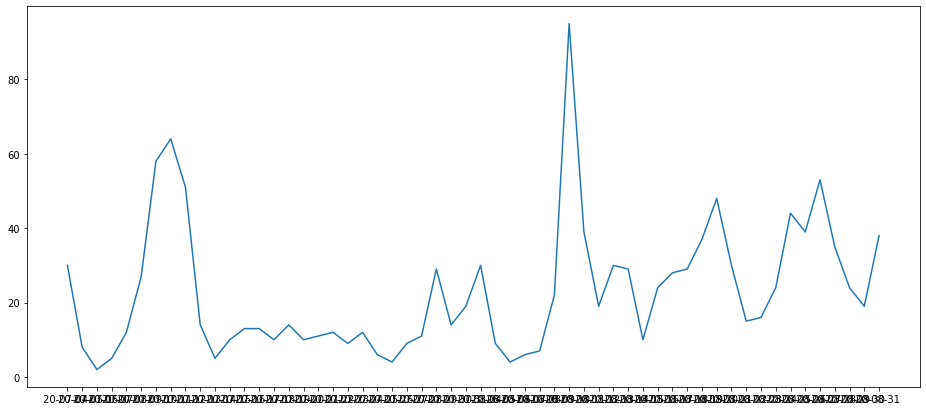

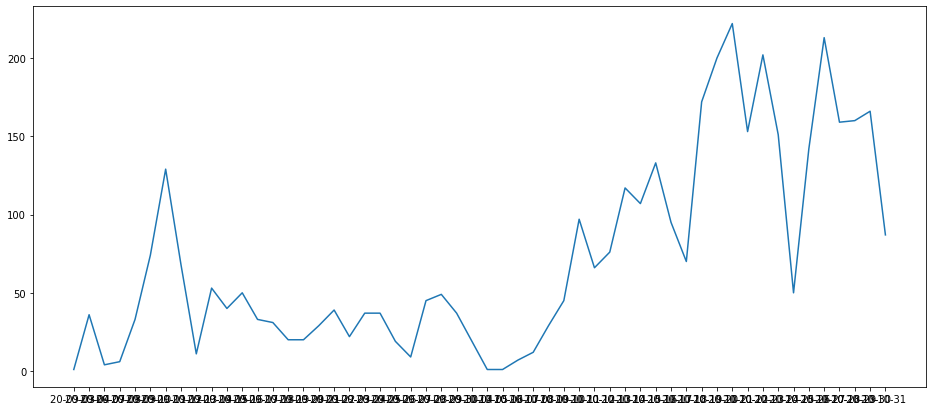

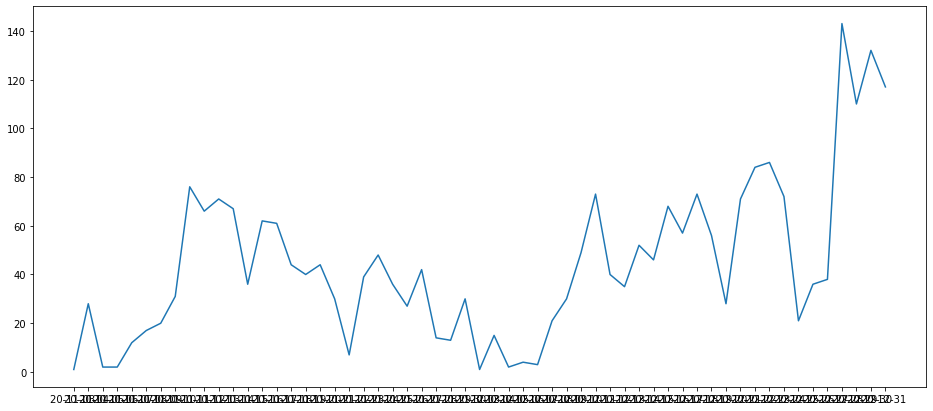

In [10]:
for q in query:
        graph_plot(q, 'TipusCasData', 'TotalCasos')

### Query 6: consulta número de alta diarias y defunciones diarias durante el año 2020

In [11]:
fexec.map(getData, [
    "SELECT DISTINCT TipusCasData, AltesDiaries FROM database WHERE AltesDiaries IS NOT NULL",
    "SELECT DISTINCT TipusCasData, DefuncionsDiaries FROM database WHERE AltesDiaries IS NOT NULL"
])
query = fexec.get_result()

2021-06-16 13:36:54,586 [INFO] lithops.invokers -- ExecutorID 0f4467-0 | JobID M002 - Selected Runtime: meszon/lithops-custom-runtimev38:0.1 - 2048MB
2021-06-16 13:36:54,590 [INFO] lithops.job.job -- ExecutorID 0f4467-0 | JobID M002 - Uploading function and data - Total: 1.1KiB
2021-06-16 13:36:54,831 [INFO] lithops.invokers -- ExecutorID 0f4467-0 | JobID M002 - Starting function invocation: getData() - Total: 2 activations
2021-06-16 13:36:54,833 [INFO] lithops.invokers -- ExecutorID 0f4467-0 | JobID M002 - View execution logs at /tmp/lithops/logs/0f4467-0-M002.log
2021-06-16 13:36:54,837 [INFO] lithops.wait -- ExecutorID 0f4467-0 - Getting results from functions


    0%|          | 0/9  

2021-06-16 13:37:02,001 [INFO] lithops.executors -- ExecutorID 0f4467-0 - Cleaning temporary data


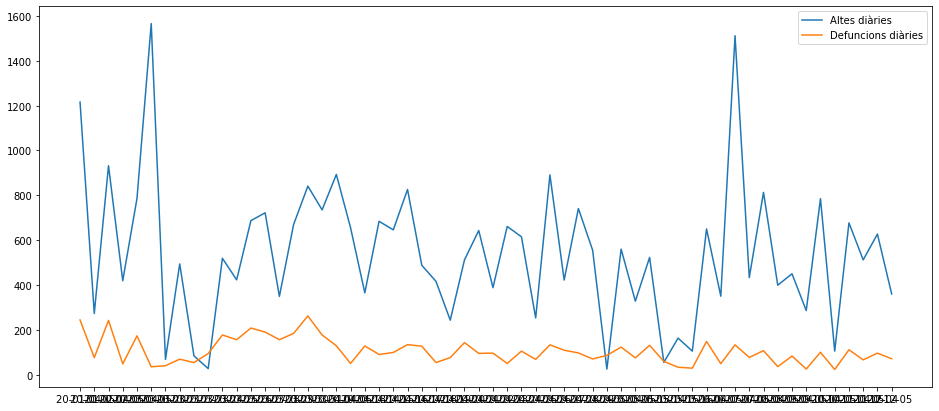

In [12]:
graph_plot_multiline(query[0], 'TipusCasData', 'AltesDiaries', 'Altes diàries', query[1], 'TipusCasData', 'DefuncionsDiaries', 'Defuncions diàries')